In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

In [3]:
digits = sklearn.datasets.load_digits()

X= digits.data
Y = digits.target

print X.shape, Y.shape



(1797, 64) (1797,)


"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [11]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = .33, random_state = 42)
X_norm = np.mean(X_train, axis = 0)

X_train_norm = X_train - X_norm 
X_test_norm = X_test - X_norm
print X_train_norm.shape
print X_test_norm.shape
print Y_train.shape
print Y_test.shape


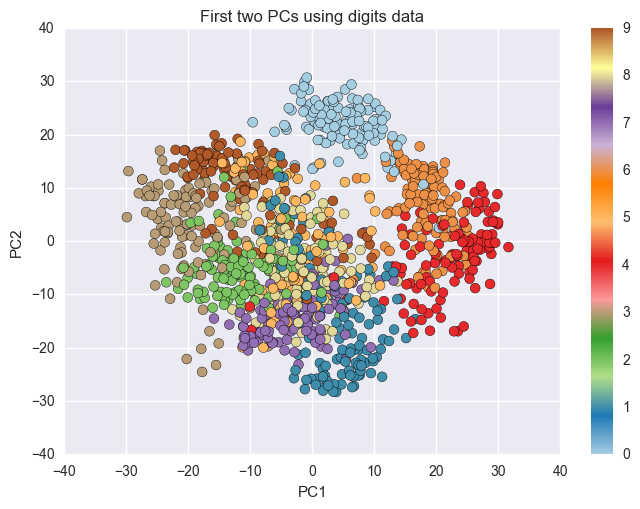

In [14]:
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_train_norm)

plt.scatter(X_2d[:,0], X_2d[:,1], c=Y_train, s = 50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using digits data')
plt.show()

In [15]:
def compute_test(x_test, y_test, clf, cv):
    KFolds = sklearn.cross_validation.KFold(x_test.shape[0], n_folds = cv)
    
    scores = []
    for i,j in KFolds:
        test_set = x_test[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels,clf.predict(test_set)))
    return scores

In [16]:
k = np.arange(20)+1
parameters = {'n_neighbors': k}

knearest = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knearest, parameters, cv=10)

accuracy = []
params = []

no_of_dimensions = [1,2,3,4,5,6,7,8,9,10]
for d in no_of_dimensions:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d<64:
        X_fit = svd.fit_transform(X_train)
        X_fit_atest = svd.transform(X_test)
        
    else:
        X_nl = X_train
        X_nl1 = X_test
    
    clf.fit(X_fit, Y_train)
    
    accuracy.append(compute_test(x_test = X_fit_atest, y_test = Y_test, clf = clf, cv = 10))
    params.append(clf.best_params_['n_neighbors'])

NameError: global name 'test_labels' is not defined

In [18]:
k = np.arange(20)+1
print k 
parameters = {'n_neighbors':k}
parameters

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

In [ ]:
iris = sklearn.datasets.load_iris()

X= iris.data
Y= iris.target

print X.shape, Y.shape
